In [1]:
import gdal
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import subprocess
%matplotlib inline

In [3]:
tifs = [os.path.basename(f) for f in sorted(glob('./predictions/images/*.tif'))]
a_dir = './predictions/images'
b_dir = './predictions/processed/v1-00'
b2_dir = './predictions/processed/v1-01'

In [22]:
i= 13
a = np.moveaxis(gdal.Open('%s/%s'%(a_dir, tifs[i])).ReadAsArray().astype('uint8'), 0,-1)
b = np.moveaxis(gdal.Open('%s/%s'%(b_dir, tifs[i])).ReadAsArray(), 0,-1)
b2 = np.moveaxis(gdal.Open('%s/%s'%(b2_dir, tifs[i])).ReadAsArray(), 0,-1)


In [47]:
v = np.zeros(np.shape(b)[:2]).astype('bool')
thr = (1-0.35) * 255

v[b[:,:,3]<=thr] = 1

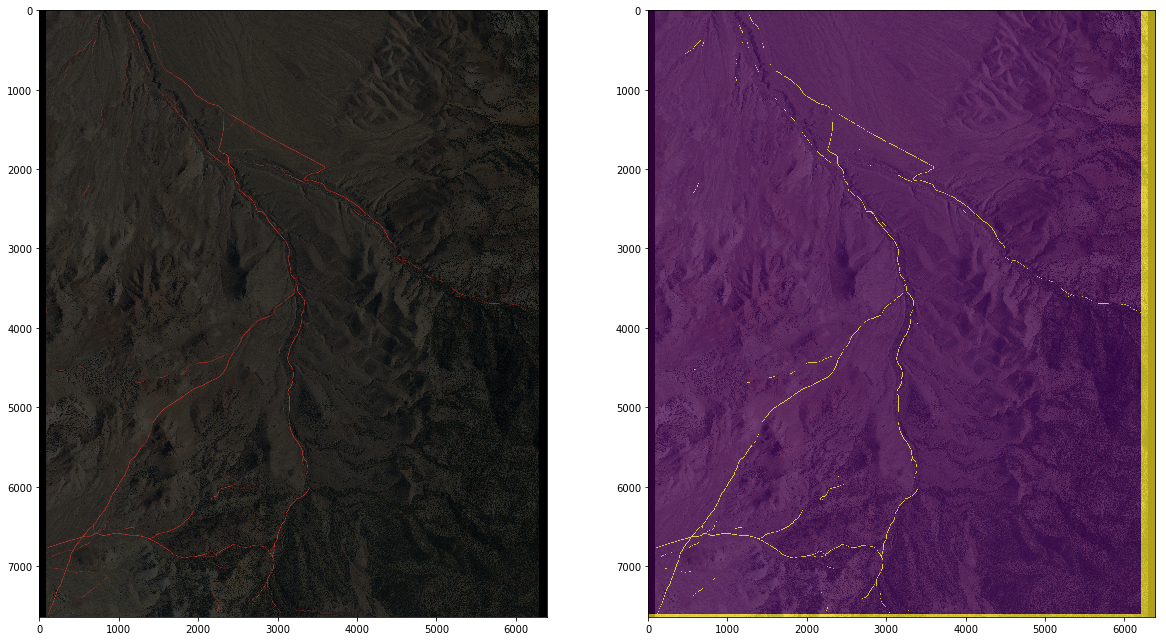

In [48]:
f, ax = plt.subplots(1,2,figsize=(20,20))
ax[0].imshow(a[:,:,:3])
ax[0].imshow(b[:,:,:3], alpha=0.7)

ax[1].imshow(a[:,:,:3])
ax[1].imshow(v, alpha=0.7)

In [27]:
target_dir = './predictions/processed/v1-00/mosaic'
target = '%s/rasterlist.txt'%target_dir
tiles = sorted(glob('./predictions/processed/v1-00/*.tif'))
nums = np.array([int(t.split('_')[2]) for t in tiles])
idx = np.argsort(nums)
f = open(target, 'w')
for i in idx:
    f.write('%s\n' % tiles[i])
f.close()

if not os.path.exists(target_dir):
    os.makedirs(target_dir)
cmd = 'python ./src/gdal_merge.py -o %s/mosaic.tif -q -v --optfile %s' %(target_dir, target)
print(cmd)
subprocess.call(cmd.split(' '))

python ./src/gdal_merge.py -o ./predictions/processed/v1-00/mosaic/mosaic.tif -q -v --optfile ./predictions/processed/v1-00/mosaic/rasterlist.txt


0

In [25]:
mos = np.moveaxis(gdal.Open('./predictions/processed/v1-00/mosaic/mosaic.tif').ReadAsArray(), 0, -1)
v = np.zeros(np.shape(mos)[:2]).astype('bool')
thr = (1-0.15) * 255

v[mos[:,:,3]<=thr] = True 

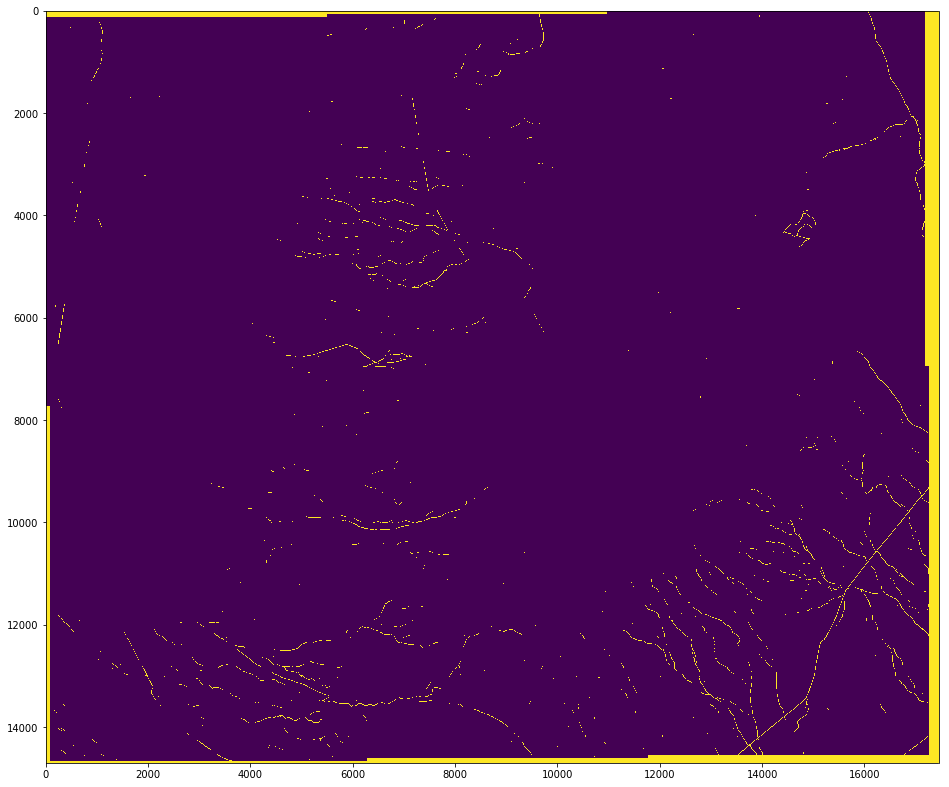

In [26]:
f, ax = plt.subplots(1,1, figsize=(16,16))
ax.imshow(v)

In [5]:
cmd = 'gdalwarp -t_srs EPSG:3857 ./predictions/processed/v1-00/mosaic/mosaic.tif ./predictions/processed/v1-00/mosaic/mosaic_3857.tif'
subprocess.call(cmd.split(' '))

#cmd = 'python ./src/gdal2mbtiles.py newImage.tif'
#subprocess.call(cmd.split(' '))

2

In [6]:
a = gdal.Open('./predictions/processed/v1-00/mosaic/mosaic_3857.tif')

In [9]:
a.GetProjection()

'PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'